# Problem Statement: The goal of this project is to predict whether a patient has
# Chronic Kidney Disease (CKD) based on various medical features such as blood
# pressure, blood sugar levels, and other health indicators. This is a binary
# classification task where the target variable (class) indicates the presence (ckd) or
# absence (notckd) of the disease.

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_csv('/content/kidney_disease.csv', index_col='id')
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd


In [ ]:
# Check if there are any missing values
df.isna().sum().sort_values(ascending=False)

,0
rbc,152
rc,130
wc,105
pot,88
sod,87
pcv,70
pc,65
hemo,52
su,49
sg,47


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    object 


In [ ]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
# Rename columns to make them more readable
col={'age': 'age',
     'bp': 'blood_pressure',
     'sg': 'specific_gravity',
     'al': 'albumin',
     'su': 'sugar',
     'rbc': 'red_blood_cells',
     'pc': 'pus_cell',
     'pcc': 'pus_cell_clumps',
     'ba': 'bacteria',
     'bgr': 'blood_glucose_random',
     'bu': 'blood_urea',
     'sc': 'serum_creatinine',
     'sod': 'sodium',
     'pot': 'potassium',
     'hemo': 'hemoglobin',
     'pcv': 'packed_cell_volume',
     'wc': 'white_blood_cell_count',
     'rc': 'red_blood_cell_count',
     'htn': 'hypertension',
     'dm': 'diabetes_mellitus',
     'cad': 'coronary_artery_disease',
     'appet': 'appetite',
     'pe': 'pedal_edema',
     'ane': 'anemia',
     'classification': 'class'}
df.rename(columns=col, inplace=True)
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd


In [ ]:
# View the overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               348 no

In [ ]:
# Convert object type to numeric type
df['packed_cell_volume']     = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count']   = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [ ]:
# Print the number of unique values for each column
for col in df.columns:
    print(f'{col} has {df[col].nunique()} values')

age has 76 values
blood_pressure has 10 values
specific_gravity has 5 values
albumin has 6 values
sugar has 6 values
red_blood_cells has 2 values
pus_cell has 2 values
pus_cell_clumps has 2 values
bacteria has 2 values
blood_glucose_random has 146 values
blood_urea has 118 values
serum_creatinine has 84 values
sodium has 34 values
potassium has 40 values
hemoglobin has 115 values
packed_cell_volume has 42 values
white_blood_cell_count has 89 values
red_blood_cell_count has 45 values
hypertension has 2 values
diabetes_mellitus has 5 values
coronary_artery_disease has 3 values
appetite has 2 values
pedal_edema has 2 values
anemia has 2 values
class has 3 values


In [ ]:
# Classify columns: categorical columns and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype=='object']
num_cols = [col for col in df.columns if df[col].dtype!='object']

In [ ]:
len(cat_cols)


11

In [ ]:
len(num_cols)

14

In [ ]:
# View the specific values in the categorical columns
for col in cat_cols:
    print(f'{col} has {df[col].unique()} values')

red_blood_cells has [nan 'normal' 'abnormal'] values
pus_cell has ['normal' 'abnormal' nan] values
pus_cell_clumps has ['notpresent' 'present' nan] values
bacteria has ['notpresent' 'present' nan] values
hypertension has ['yes' 'no' nan] values
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values
coronary_artery_disease has ['no' 'yes' '\tno' nan] values
appetite has ['good' 'poor' nan] values
pedal_edema has ['no' 'yes' nan] values
anemia has ['no' 'yes' nan] values
class has ['ckd' 'ckd\t' 'notckd'] values


In [ ]:
# Replace non-standard values
df['diabetes_mellitus'].replace(to_replace={'\tno':'no',
                                            '\tyes':'yes',
                                            ' yes':'yes'},
                                inplace=True)
df['coronary_artery_disease'].replace(to_replace={'\tno':'no'},
                                      inplace=True)
df['class'].replace(to_replace={'ckd\t':'ckd',
                                'notckd':'not ckd'},
                    inplace=True)

In [ ]:
# Convert the 'class' column to binary numeric form (0 and 1)
df['class'] = df['class'].map({'ckd':0, 'not ckd':1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [ ]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f'{col} has {df[col].unique()} values')

diabetes_mellitus has ['yes' 'no' nan] values
coronary_artery_disease has ['no' 'yes' nan] values
class has [0 1] values


In [ ]:
# View the specific values in the numeric column
for col in num_cols:
    print(f'{col} has {df[col].unique()} values')

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] values
blood_pressure has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] values
specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] values
albumin has [ 1.  4.  2.  3.  0. nan  5.] values
sugar has [ 0.  3.  4.  1. nan  2.  5.] values
blood_glucose_random has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 297. 

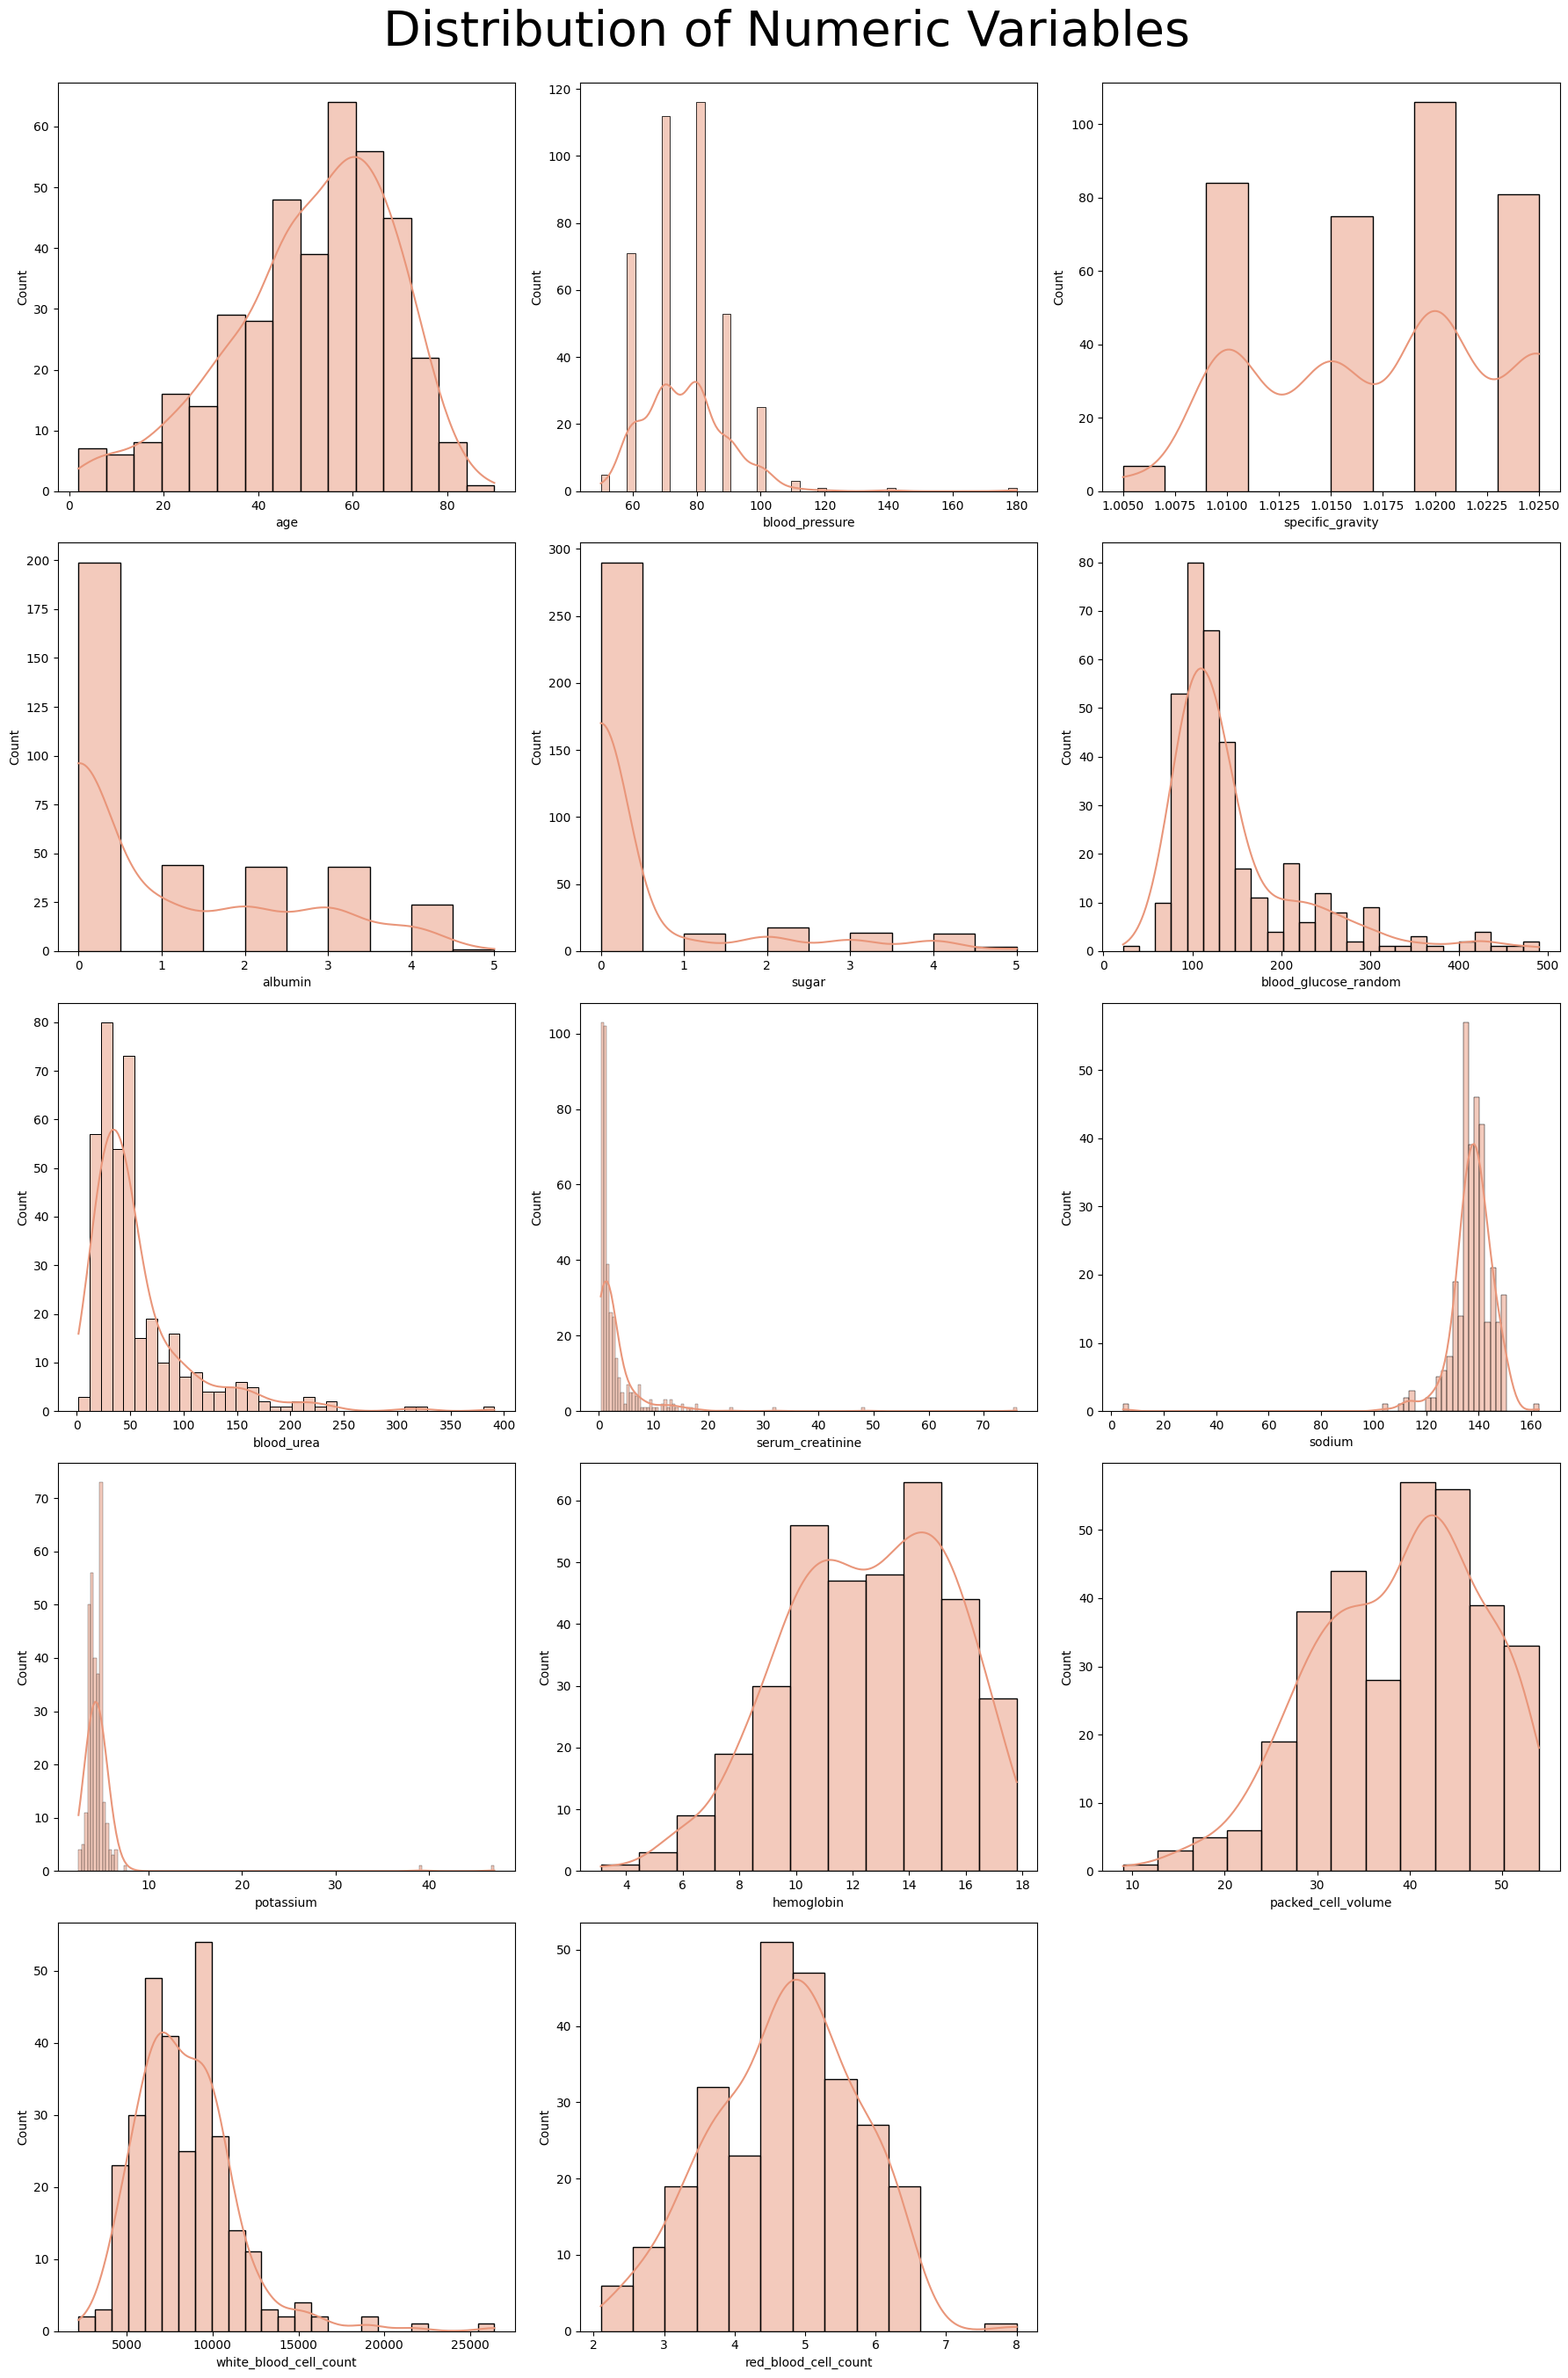

In [ ]:
# Distribution of numeric variables
plt.figure(figsize=(18, 27))
plotnumber = 1

for col in num_cols:
    if plotnumber <= len(num_cols):
        ax = plt.subplot(5, 3, plotnumber)
        sns.histplot(x=df[col], kde=True, color='darksalmon')
        plt.xlabel(col)

    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

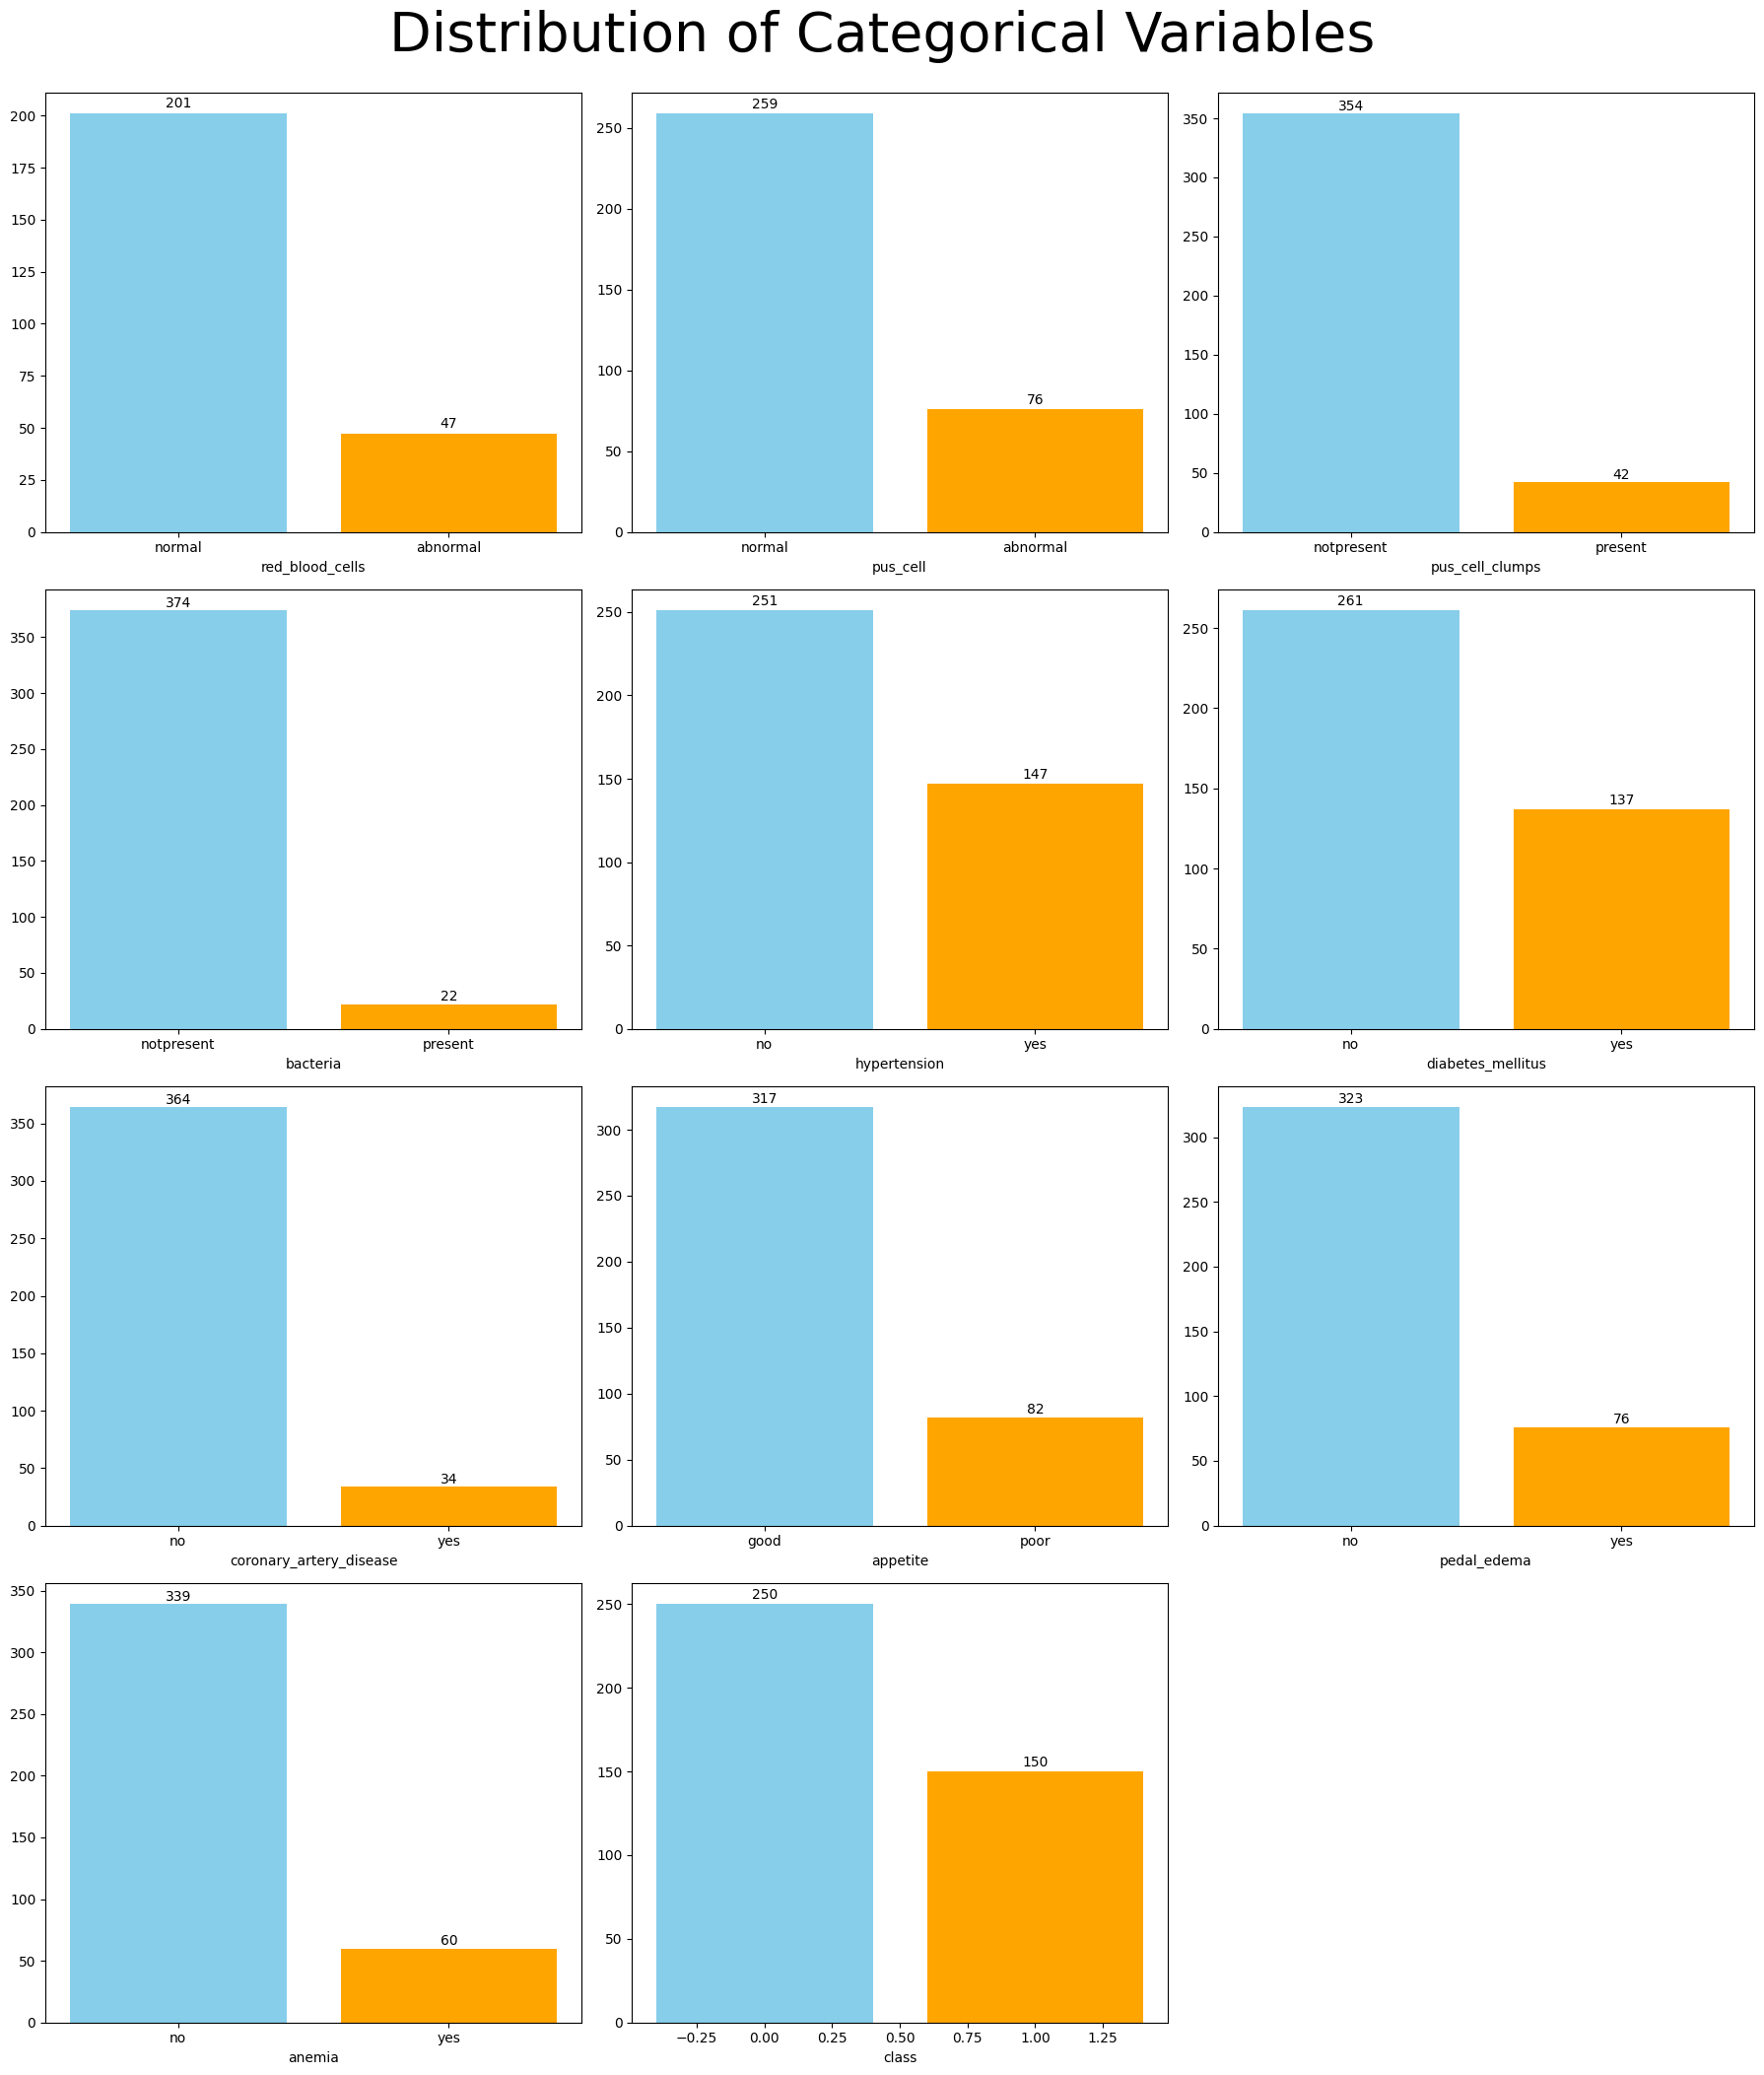

In [ ]:
# Distribution of categorical variables
plt.figure(figsize=(18, 21))
plotnumber = 1

colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'lightcoral', 'cyan', 'pink']

for col in cat_cols:
    if plotnumber <= len(cat_cols):
        ax = plt.subplot(4, 3, plotnumber)
        # sns.countplot(x=df[col], palette = 'pastel')
        counts = df[col].value_counts()
        ax.bar(counts.index, counts.values, color=colors[:len(counts)])

        # Add labels to each bar in the plot
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height()+3, f'{p.get_height()}', ha="center")

        plt.xlabel(col)

    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

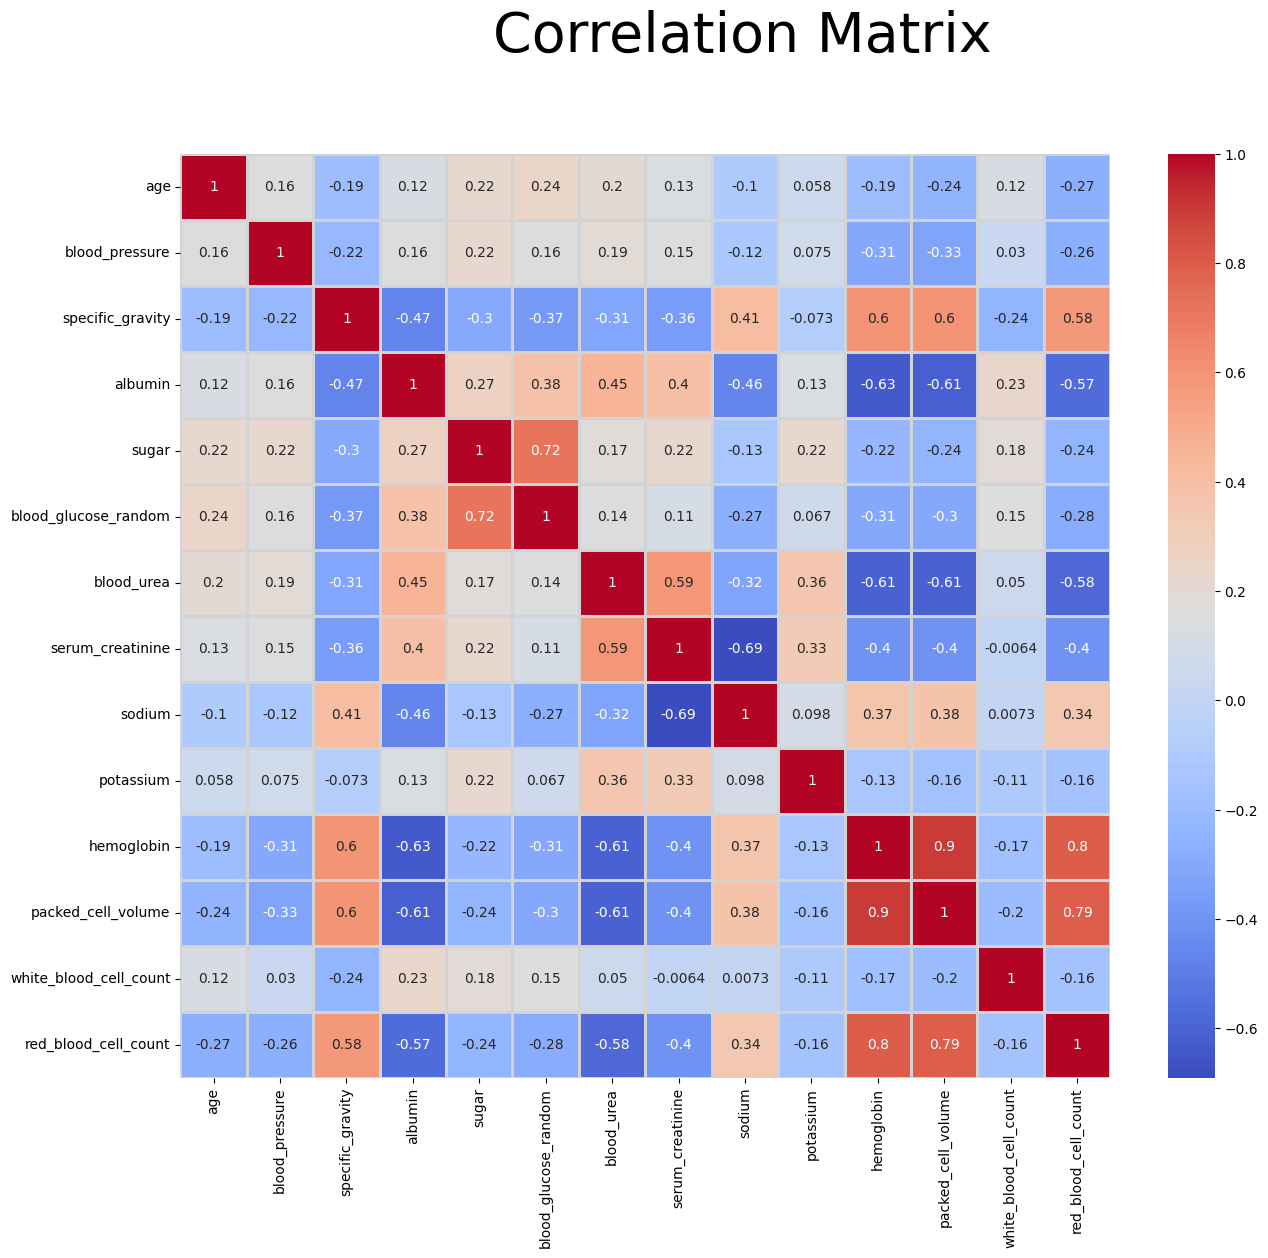

In [ ]:
# Correlation matrix of numeric columns
num_df = df[num_cols]

plt.figure(figsize=(15, 12))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

In [ ]:
import plotly.express as px
fig = px.violin(df, y='red_blood_cell_count', x="class", color="class",
                box=True, points='all', hover_data=df.columns,
                width=900, height=750)
fig.show()

In [ ]:
fig = px.violin(df, y='packed_cell_volume', x="class", color="class",
                box=True, points='all', hover_data=df.columns,
                width=900, height=750)
fig.show()

In [ ]:
fig = px.violin(df, y='hemoglobin', x="class", color="class", box=True,
                points='all', hover_data=df.columns,
                width=900, height=750)
fig.show()

In [ ]:
fig = px.scatter(df, x='red_blood_cell_count', y='packed_cell_volume', color="class",
                 width=900, height=750)
fig.show()

In [ ]:
fig = px.scatter(df, x='red_blood_cell_count', y='hemoglobin', color="class",
                 width=900, height=750)
fig.show()

In [ ]:
fig = px.scatter(df, x='hemoglobin', y='packed_cell_volume', color="class",
                 width=900, height=750)
fig.show()

In [ ]:
# Check missing values for numerical columns
df[num_cols].isnull().sum().sort_values(ascending=False)

,0
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
hemoglobin,52
sugar,49
specific_gravity,47
albumin,46
blood_glucose_random,44


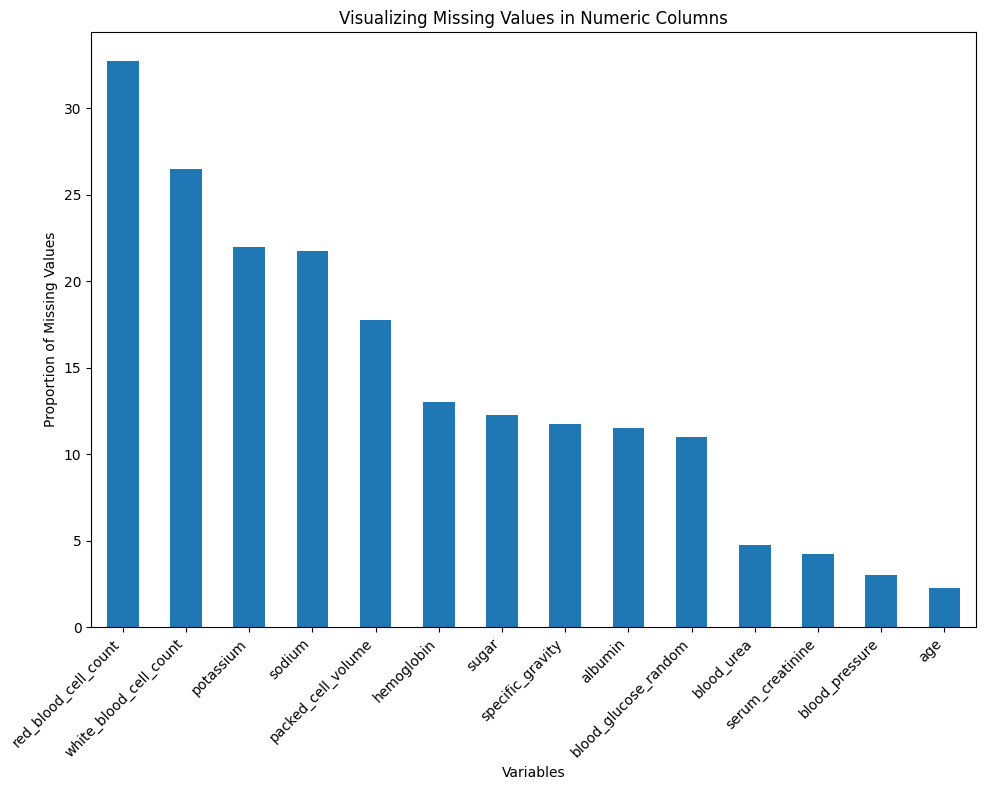

In [ ]:
# Visualize missing values in numerical columns
# Count the number of missing values in each column
missing_values = (df[num_cols].isna().sum()/df.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title('Visualizing Missing Values in Numeric Columns')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Check missing values for categorical columns
df[cat_cols].isnull().sum()

,0
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2
appetite,1
pedal_edema,1
anemia,1


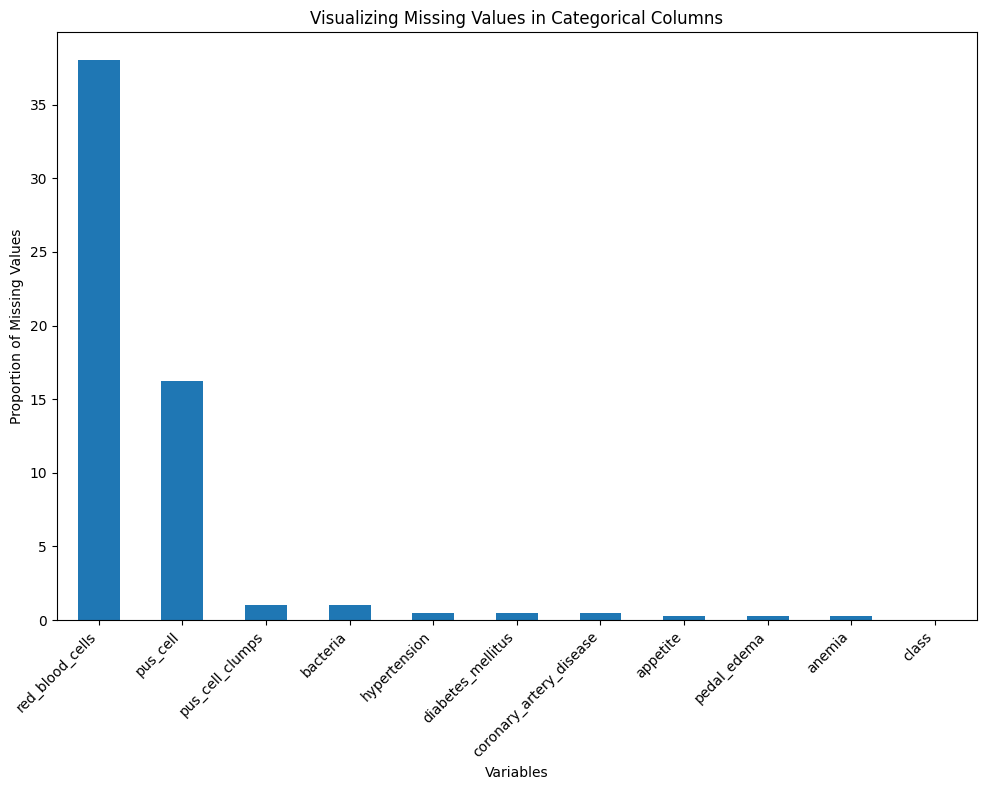

In [ ]:
# Visualize missing values in categorical columns
# Count the number of missing values in each column
missing_values = (df[cat_cols].isna().sum()/df.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title('Visualizing Missing Values in Categorical Columns')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Fill missing values in numeric columns
# Multiple iterations of interpolation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create IterativeImputer object
imputer = IterativeImputer(random_state=0, max_iter=10, sample_posterior=True)
# Use IterativeImputer to fill in missing values
df[num_cols] = imputer.fit_transform(df[num_cols])

In [ ]:
# Make sure all missing values have been filled in
df[num_cols].isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0


In [ ]:
# For feature columns with many missing values: use random values to fill in
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

# For feature columns with relatively few missing values: use the mode to fill in
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

# For the categorical columns red_blood_cells and pus_cell, use random sampling to fill
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

# For other categorical data columns, use the mode to fill
for col in cat_cols:
    impute_mode(col)

In [ ]:
# Make sure all missing values have been filled in
df[cat_cols].isnull().sum()

,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0
appetite,0
pedal_edema,0
anemia,0


#**MODELLING**

In [ ]:
# Feature encoding (label encoding)
# Convert categories to numeric values ​​using category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Prepare training data
# Define independent variables
ind_col = [col for col in df.columns if col!='class']
# Define dependent variable
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

# For later use in feature importance plotting
dataframe = X

In [ ]:
from sklearn.preprocessing import StandardScaler

# Features normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(classifier, model_name, X_train, y_train, X_test, y_test):
    """
    Train, predict, and evaluate a classifier.

    Parameters:
        classifier: The machine learning classifier to train and evaluate.
        model_name: A string representing the name of the model for display.
        X_train, y_train: Training data and labels.
        X_test, y_test: Testing data and labels.

    Returns:
        A dictionary with confusion matrix, accuracy, precision, recall, and F1 score.
    """
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='macro')
    recall = recall_score(y_test, y_test_pred, average='macro')
    f1 = f1_score(y_test, y_test_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    # Print the evaluation metrics
    print(f"Training Accuracy of {model_name}: {train_accuracy:.5f}\n")
    print(f"Confusion Matrix:\n{conf_matrix}\n")
    print(f"Test Accuracy of {model_name}: {accuracy:.5f}")
    print(f"Test Precision of {model_name}: {precision:.5f}")
    print(f"Test Recall of {model_name}: {recall:.5f}")
    print(f"Test F1 Score of {model_name}: {f1:.5f}\n")
    print(f"Classification Report:\n{class_report}")

    # Return the metrics as a dictionary
    return {
        "Model Name": model_name,
        "Training Accuracy": train_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model_name = "K-Nearest Neighbors"
knn_results = evaluate_model(knn, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of K-Nearest Neighbors: 0.93500

Confusion Matrix:
[[108  20]
 [  0  72]]

Test Accuracy of K-Nearest Neighbors: 0.90000
Test Precision of K-Nearest Neighbors: 0.89130
Test Recall of K-Nearest Neighbors: 0.92188
Test F1 Score of K-Nearest Neighbors: 0.89665

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       128
           1       0.78      1.00      0.88        72

    accuracy                           0.90       200
   macro avg       0.89      0.92      0.90       200
weighted avg       0.92      0.90      0.90       200



In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model_name = "Gaussian Naive Bayes"
gnb_results = evaluate_model(gnb, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Gaussian Naive Bayes: 0.94500

Confusion Matrix:
[[118  10]
 [  2  70]]

Test Accuracy of Gaussian Naive Bayes: 0.94000
Test Precision of Gaussian Naive Bayes: 0.92917
Test Recall of Gaussian Naive Bayes: 0.94705
Test F1 Score of Gaussian Naive Bayes: 0.93633

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       128
           1       0.88      0.97      0.92        72

    accuracy                           0.94       200
   macro avg       0.93      0.95      0.94       200
weighted avg       0.94      0.94      0.94       200



In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model_name = "Logistic Regression"
logreg_results = evaluate_model(logreg, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Logistic Regression: 1.00000

Confusion Matrix:
[[121   7]
 [  1  71]]

Test Accuracy of Logistic Regression: 0.96000
Test Precision of Logistic Regression: 0.95103
Test Recall of Logistic Regression: 0.96571
Test F1 Score of Logistic Regression: 0.95733

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       128
           1       0.91      0.99      0.95        72

    accuracy                           0.96       200
   macro avg       0.95      0.97      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
from sklearn.svm import SVC

svm = SVC()
model_name = 'Support Vector Machine'
svm_results = evaluate_model(svm, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Support Vector Machine: 0.99000

Confusion Matrix:
[[124   4]
 [  0  72]]

Test Accuracy of Support Vector Machine: 0.98000
Test Precision of Support Vector Machine: 0.97368
Test Recall of Support Vector Machine: 0.98438
Test F1 Score of Support Vector Machine: 0.97855

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       128
           1       0.95      1.00      0.97        72

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
model_name = 'Decision Tree'
dtc_results = evaluate_model(dtc, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Decision Tree: 1.00000

Confusion Matrix:
[[123   5]
 [  0  72]]

Test Accuracy of Decision Tree: 0.97500
Test Precision of Decision Tree: 0.96753
Test Recall of Decision Tree: 0.98047
Test F1 Score of Decision Tree: 0.97326

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       128
           1       0.94      1.00      0.97        72

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model_name = 'Random Forest'
rfc_results = evaluate_model(rfc, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Random Forest: 1.00000

Confusion Matrix:
[[128   0]
 [  0  72]]

Test Accuracy of Random Forest: 1.00000
Test Precision of Random Forest: 1.00000
Test Recall of Random Forest: 1.00000
Test F1 Score of Random Forest: 1.00000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        72

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
model_name = 'Extra Trees'
etc_results = evaluate_model(etc, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Extra Trees: 1.00000

Confusion Matrix:
[[126   2]
 [  3  69]]

Test Accuracy of Extra Trees: 0.97500
Test Precision of Extra Trees: 0.97429
Test Recall of Extra Trees: 0.97135
Test F1 Score of Extra Trees: 0.97279

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       128
           1       0.97      0.96      0.97        72

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
model_name = 'AdaBoost'
ada_results = evaluate_model(ada, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of AdaBoost: 1.00000

Confusion Matrix:
[[125   3]
 [  0  72]]

Test Accuracy of AdaBoost: 0.98500
Test Precision of AdaBoost: 0.98000
Test Recall of AdaBoost: 0.98828
Test F1 Score of AdaBoost: 0.98387

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       128
           1       0.96      1.00      0.98        72

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()
model_name = 'Hist Gradient Boosting'
hgb_results = evaluate_model(hgb, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Hist Gradient Boosting: 1.00000

Confusion Matrix:
[[122   6]
 [  0  72]]

Test Accuracy of Hist Gradient Boosting: 0.97000
Test Precision of Hist Gradient Boosting: 0.96154
Test Recall of Hist Gradient Boosting: 0.97656
Test F1 Score of Hist Gradient Boosting: 0.96800

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       128
           1       0.92      1.00      0.96        72

    accuracy                           0.97       200
   macro avg       0.96      0.98      0.97       200
weighted avg       0.97      0.97      0.97       200



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
model_name = 'Gradient Boosting Machine'
gbm_results = evaluate_model(gbm, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Gradient Boosting Machine: 1.00000

Confusion Matrix:
[[124   4]
 [  0  72]]

Test Accuracy of Gradient Boosting Machine: 0.98000
Test Precision of Gradient Boosting Machine: 0.97368
Test Recall of Gradient Boosting Machine: 0.98438
Test F1 Score of Gradient Boosting Machine: 0.97855

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       128
           1       0.95      1.00      0.97        72

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a stochastic gradient boosting classifier
sgbm = GradientBoostingClassifier(subsample=0.7)  # Use a subsample ratio of 0.7 to emphasize randomness
model_name = 'Stochastic Gradient Boosting Machine'
sgbm_results = evaluate_model(sgbm, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Stochastic Gradient Boosting Machine: 1.00000

Confusion Matrix:
[[124   4]
 [  0  72]]

Test Accuracy of Stochastic Gradient Boosting Machine: 0.98000
Test Precision of Stochastic Gradient Boosting Machine: 0.97368
Test Recall of Stochastic Gradient Boosting Machine: 0.98438
Test F1 Score of Stochastic Gradient Boosting Machine: 0.97855

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       128
           1       0.95      1.00      0.97        72

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
model_name = 'XGBoost'
xgb_results = evaluate_model(xgb, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of XGBoost: 1.00000

Confusion Matrix:
[[124   4]
 [  0  72]]

Test Accuracy of XGBoost: 0.98000
Test Precision of XGBoost: 0.97368
Test Recall of XGBoost: 0.98438
Test F1 Score of XGBoost: 0.97855

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       128
           1       0.95      1.00      0.97        72

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(verbose=-1)
model_name = 'LightGBM'
lgbm_results = evaluate_model(lgbm, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of LightGBM: 1.00000

Confusion Matrix:
[[122   6]
 [  0  72]]

Test Accuracy of LightGBM: 0.97000
Test Precision of LightGBM: 0.96154
Test Recall of LightGBM: 0.97656
Test F1 Score of LightGBM: 0.96800

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       128
           1       0.92      1.00      0.96        72

    accuracy                           0.97       200
   macro avg       0.96      0.98      0.97       200
weighted avg       0.97      0.97      0.97       200



In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0)
model_name = 'Multilayer Perceptron'
mlp_results = evaluate_model(mlp, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Multilayer Perceptron: 0.99500

Confusion Matrix:
[[123   5]
 [  0  72]]

Test Accuracy of Multilayer Perceptron: 0.97500
Test Precision of Multilayer Perceptron: 0.96753
Test Recall of Multilayer Perceptron: 0.98047
Test F1 Score of Multilayer Perceptron: 0.97326

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       128
           1       0.94      1.00      0.97        72

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



In [ ]:
accuracy = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM',
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost',
              'Hist Gradient Boosting', 'GBM', 'SGBM', 'XGBoost',
               'LightGBM', 'MLP'],
    'Score': [knn_results['Accuracy'], gnb_results['Accuracy'], logreg_results['Accuracy'],
              svm_results['Accuracy'], dtc_results['Accuracy'], rfc_results['Accuracy'],
              etc_results['Accuracy'], ada_results['Accuracy'], hgb_results['Accuracy'],
              gbm_results['Accuracy'], sgbm_results['Accuracy'], xgb_results['Accuracy'],
              lgbm_results['Accuracy'], mlp_results['Accuracy']]
})

accuracy_sorted = accuracy.sort_values(by='Score', ascending=False)
accuracy_sorted

,Model,Score
5,Random Forest,1.000
7,AdaBoost,0.985
3,SVM,0.980
9,GBM,0.980
10,SGBM,0.980
11,XGBoost,0.980
4,Decision Tree,0.975
6,Extra Trees,0.975
13,MLP,0.975
8,Hist Gradient Boosting,0.970


In [ ]:
fig = px.bar(data_frame=accuracy_sorted, x='Score', y='Model', color='Score',
             title='Accuracy Comparison', text='Score',
             width=900, height=750)
fig.show()

In [ ]:
precision = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM',
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost',
              'Hist Gradient Boosting', 'GBM', 'SGBM', 'XGBoost',
               'LightGBM', 'MLP'],
    'Score': [knn_results['Precision'], gnb_results['Precision'], logreg_results['Precision'],
              svm_results['Precision'], dtc_results['Precision'], rfc_results['Precision'],
              etc_results['Precision'], ada_results['Precision'], hgb_results['Precision'],
              gbm_results['Precision'], sgbm_results['Precision'], xgb_results['Precision'],
               lgbm_results['Precision'], mlp_results['Precision']]
})

precision_sorted = precision.sort_values(by='Score', ascending=False)
precision_sorted

,Model,Score
5,Random Forest,1.000000
7,AdaBoost,0.980000
6,Extra Trees,0.974288
3,SVM,0.973684
9,GBM,0.973684
10,SGBM,0.973684
11,XGBoost,0.973684
4,Decision Tree,0.967532
13,MLP,0.967532
8,Hist Gradient Boosting,0.961538


In [ ]:
fig = px.bar(data_frame = precision_sorted, x='Score', y='Model', color='Score',
             title='Precision Comparison', text='Score',
             width=900, height=750)
fig.show()

In [ ]:
recall = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM',
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost',
              'Hist Gradient Boosting', 'GBM', 'SGBM', 'XGBoost',
             'LightGBM', 'MLP'],
    'Score': [knn_results['Recall'], gnb_results['Recall'], logreg_results['Recall'],
              svm_results['Recall'], dtc_results['Recall'], rfc_results['Recall'],
              etc_results['Recall'], ada_results['Recall'], hgb_results['Recall'],
              gbm_results['Recall'], sgbm_results['Recall'], xgb_results['Recall'],
              lgbm_results['Recall'], mlp_results['Recall']]
})

recall_sorted = recall.sort_values(by='Score', ascending=False)
recall_sorted

,Model,Score
5,Random Forest,1.000000
7,AdaBoost,0.988281
3,SVM,0.984375
9,GBM,0.984375
10,SGBM,0.984375
11,XGBoost,0.984375
4,Decision Tree,0.980469
13,MLP,0.980469
8,Hist Gradient Boosting,0.976562
12,LightGBM,0.976562


In [ ]:
fig = px.bar(data_frame = recall_sorted, x='Score', y='Model', color='Score',
             title='Recall Comparison', text='Score',
             width=900, height=750)
fig.show()

In [ ]:
f1_score = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM',
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost',
              'Hist Gradient Boosting', 'GBM', 'SGBM', 'XGBoost',
               'LightGBM', 'MLP'],
    'Score': [knn_results['F1 Score'], gnb_results['F1 Score'], logreg_results['F1 Score'],
              svm_results['F1 Score'], dtc_results['F1 Score'], rfc_results['F1 Score'],
              etc_results['F1 Score'], ada_results['F1 Score'], hgb_results['F1 Score'],
              gbm_results['F1 Score'], sgbm_results['F1 Score'], xgb_results['F1 Score'],
              lgbm_results['F1 Score'], mlp_results['F1 Score']]
})

f1_score_sorted = f1_score.sort_values(by='Score', ascending=False)
f1_score_sorted

,Model,Score
5,Random Forest,1.000000
7,AdaBoost,0.983867
3,SVM,0.978550
9,GBM,0.978550
10,SGBM,0.978550
11,XGBoost,0.978550
4,Decision Tree,0.973261
13,MLP,0.973261
6,Extra Trees,0.972790
8,Hist Gradient Boosting,0.968000


In [ ]:
fig = px.bar(data_frame = f1_score_sorted, x='Score', y='Model', color='Score',
             title='F1_score Comparison', text='Score',
             width=900, height=750)
fig.show()